#### SARIMAX

* SARIMAX supports exogenous regressor variables
* Endogenous Variables are dependent on many outside influences
* Exogenous Variables are not effected by outside influences

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df


In [34]:
oil_df = pd.read_csv('../datasets/BrentOilPrices.csv', index_col='Date', parse_dates=True)
oil_df.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5204\4180292967.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [35]:
oil_df['holiday'] = 0
random_indices = np.random.choice(oil_df.index, size=20, replace=False)
oil_df.loc[random_indices, 'holiday'] = 1
oil_df.head()
# df.loc[m, 'holiday'] = np.random.choice(extra_sports, size=m.sum())

,Price,holiday
Date,,
1987-05-20,18.63,0
1987-05-21,18.45,0
1987-05-22,18.55,0
1987-05-25,18.60,0
1987-05-26,18.63,0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5204\1835976055.py:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: xlabel='Date'>

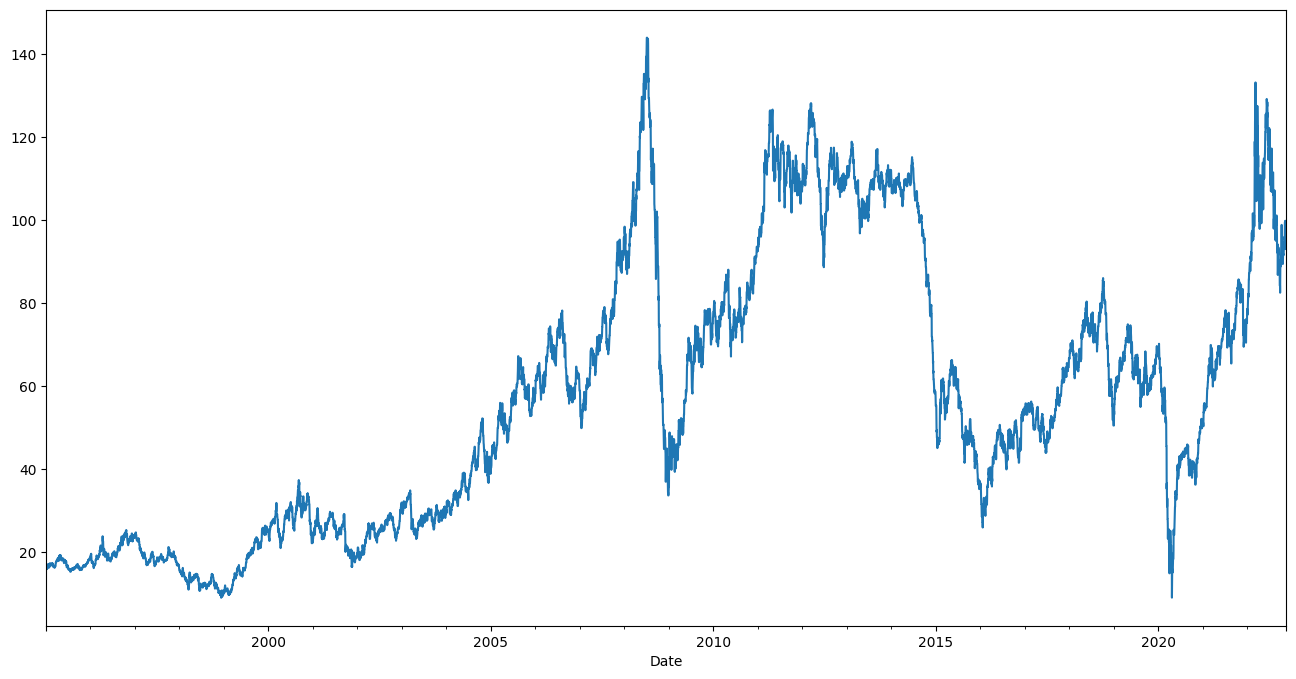

In [36]:
oil_df = oil_df[(oil_df.index>'1993-01-01') & (oil_df.index>'1995-01-01')]
oil_df = oil_df.asfreq('D')
oil_df['holiday'] = oil_df['holiday'].fillna(0)
oil_df = oil_df.fillna(method='ffill')
oil_df['Price'].plot(figsize=(16,8))

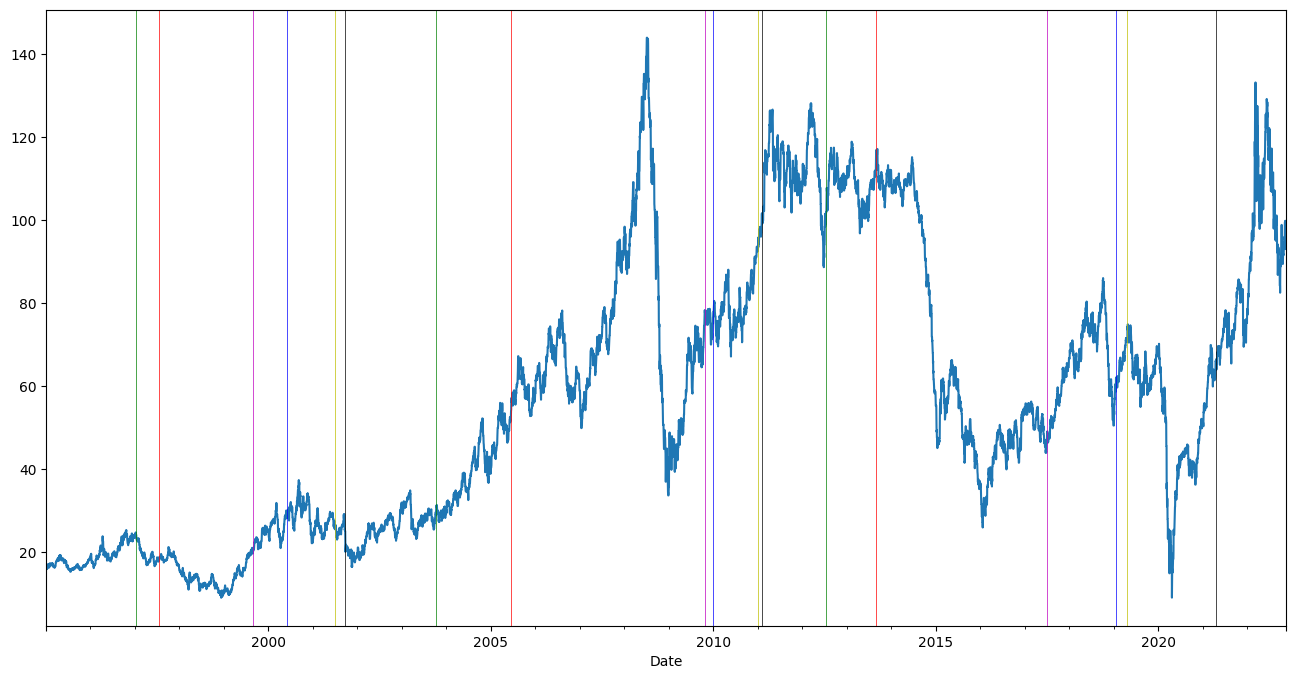

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = oil_df['Price'].plot()

color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_index =0
for x in oil_df[oil_df['holiday']==1].index:
    ax.axvline(x=x, color=color_arr[c_index], linewidth=0.5)
    if color_arr[c_index] == 'k':
        c_index =0
    else:
        c_index +=1

### Seasonal Component

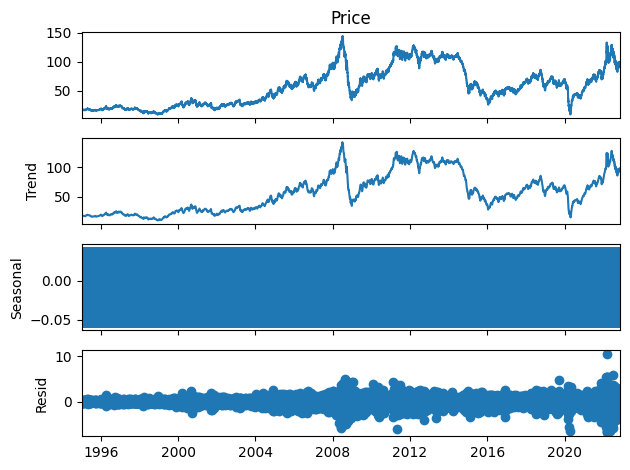

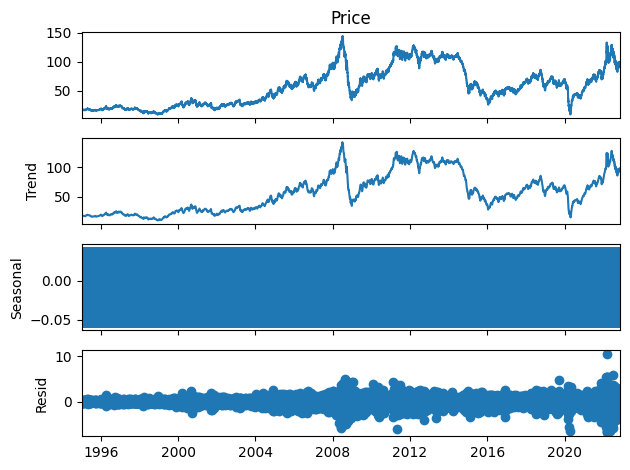

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

res =  seasonal_decompose(oil_df['Price'])
res.plot()

<Axes: xlabel='Date'>

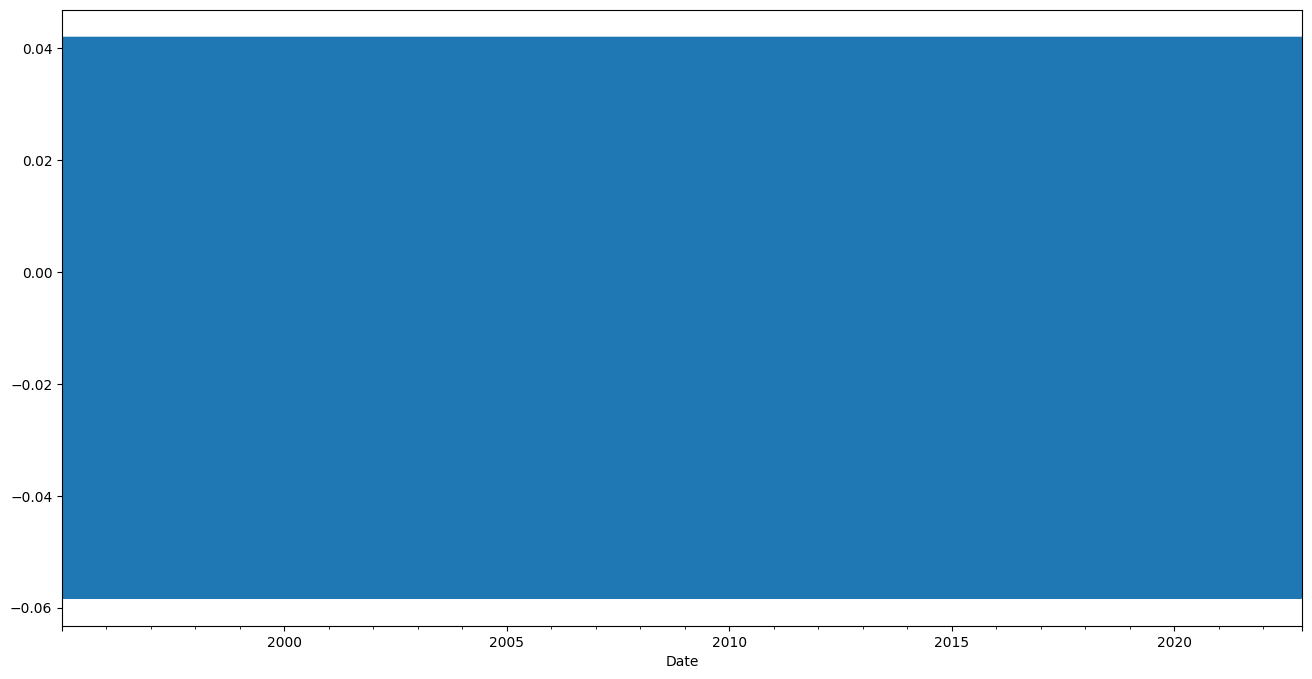

In [43]:
res.seasonal.plot(figsize=(16, 8))

#### Auto ARIMA

In [51]:
auto_arima(oil_df['Price'], m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=31183.192, Time=15.89 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=31189.642, Time=0.23 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=31191.491, Time=1.58 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=31191.430, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=31188.116, Time=0.15 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=31181.257, Time=11.28 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=31179.809, Time=5.21 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=31181.273, Time=9.40 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=31186.827, Time=3.70 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=31186.641, Time=3.76 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=31184.007, Time=5.30 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=31166.670, Time=19.77 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=31166.697, Time=25.43 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=31167.378, Time=25.62 sec
 ARIMA(2,1,3)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10178
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -15572.824
Date:                Mon, 29 Apr 2024   AIC                          31159.649
Time:                        14:37:21   BIC                          31210.244
Sample:                    01-03-1995   HQIC                         31176.760
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7281      0.006   -132.145      0.000      -0.739      -0.717
ar.L2         -0.9773      0.006   -167.211      0.000      -0.989      -0.966
ma.L1          0.7378      0.008     91.019      0.000       0.722       0.754
ma.L2          0.9617      0.009    103.761      0.000       0.944       0.980
ma.L3          0.0003      0.007      0.050      0.960      -0.013       0.014
ma.L4         -0.0282      0.006     -4.699      0.000      -0.040      -0.016
sigma2         1.2491      0.006    203.936      0.000       1.237       1.261
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            110611.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.68   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make Predictions

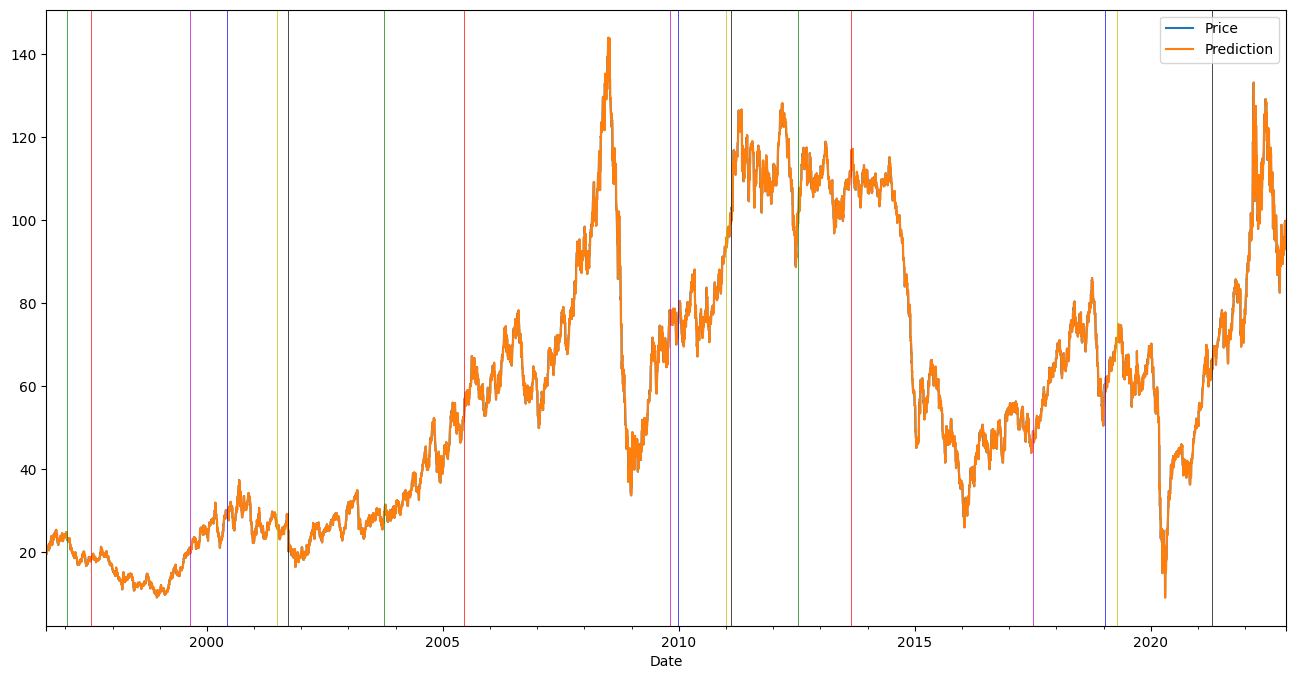

In [52]:
train_df = oil_df.iloc[:580]
test_df = oil_df.iloc[580:]

model = SARIMAX(oil_df['Price'], order=(1,1,1), seasonal_order=(2,0,0,7))
res= model.fit()
start = len(train_df)
end = len(train_df) + len(test_df) -1

prediction = res.predict(start, end).rename("Prediction")
ax = test_df['Price'].plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)

color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_index =0
for x in oil_df[oil_df['holiday']==1].index:
    ax.axvline(x=x, color=color_arr[c_index], linewidth=0.5)
    if color_arr[c_index] == 'k':
        c_index =0
    else:
        c_index +=1

#### Does Adding Holiday Data Help?

In [53]:
from statsmodels.tools.eval_measures import rmse
rmse(test_df['Price'], prediction)


1.1508615079624978

In [60]:

auto_arima(oil_df['Price'], exogenous=oil_df[['holiday']], seasonal=True,
            m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=31183.192, Time=16.37 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=31189.642, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=31191.491, Time=1.63 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=31191.430, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=31188.116, Time=0.16 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=31181.257, Time=10.69 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=31179.809, Time=4.17 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=31181.273, Time=9.83 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=31186.827, Time=4.21 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=31186.641, Time=6.92 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=31184.007, Time=14.64 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=31166.670, Time=19.45 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=31166.697, Time=35.03 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=31167.378, Time=52.33 sec
 ARIMA(2,1,3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10178
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -15572.824
Date:                Mon, 29 Apr 2024   AIC                          31159.649
Time:                        15:24:06   BIC                          31210.244
Sample:                    01-03-1995   HQIC                         31176.760
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7281      0.006   -132.145      0.000      -0.739      -0.717
ar.L2         -0.9773      0.006   -167.211      0.000      -0.989      -0.966
ma.L1          0.7378      0.008     91.019      0.000       0.722       0.754
ma.L2          0.9617      0.009    103.761      0.000       0.944       0.980
ma.L3          0.0003      0.007      0.050      0.960      -0.013       0.014
ma.L4         -0.0282      0.006     -4.699      0.000      -0.040      -0.016
sigma2         1.2491      0.006    203.936      0.000       1.237       1.261
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            110611.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.68   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(train_df['Price'], exog=train_df[['holiday']],
                order=(1,1,), seasonal_order=(2,0,0,7))
res = model.fit()
start = len(train_df)
end = len(train_df) + len(test_df) -1

prediction = res.predict(start, end).rename("Prediction")
ax = test_df['holiday'].plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)